<a href="https://colab.research.google.com/github/kamila-in-dataland/The-Office-Project/blob/main/EN_Data_analysis_of_%22The_Office%22_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis of "The Office" series



"The Office" is an American comedy television series based on the British version of the series which had the same title. It premiered in 2005 and ran for nine seasons - up to 2013.

The plot of the series "The Office" takes place in the office of a paper sales company - Dunder Mifflin Paper Company in Scranton, Pennsylvania. The series takes the form of a fictional documentary focusing on reporting on the daily life of the office employees. One of the main characters is Michael Scott, played by Steve Carell, who serves as the company's slightly unconventional branch manager.

"The Office" series is known for its peculiar style of comedy, built on situational jokes and awkward dialogues. The sitcom has gained enormous popularity and has acquired a cult status, not only in the United States, but also around the world. Through being shot in a mockumentary style (it pretends to be a documentary), its content often refers to reality, such as a stock market crash, a collapse in sales of paper products or an unstable market situation.

In my project, I focused on analyzing data about the series, i.e., assessing changes in its popularity over the years, taking into account controversial decisions made by directors, such as the removal of Steve Carell from the series - who by many was considered the mainstay actor of the series.

I also conducted an analysis of the series' script using natural language processing algorithms. In addition, I checked whether the series accurately represented the sentiment of the paper market in the years in which the series was set, using actual sales data for paper products in the US market.



# Import of the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import warnings
warnings.filterwarnings('ignore')
nltk.download('popular')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import bigrams
from nltk import ngrams
from textblob import TextBlob

# The first data set... and first problems

## Importing the first data set and its initial analysis

Initially, I intended to use a ready-made data set that I downloaded from the kaggle.com website: https://www.kaggle.com/datasets/nehaprabhavalkar/the-office-dataset

First, however, I decided to evaluate it for its usefulness for data analysis.... fortunately.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#Display the first 3 rows of the data frame to view its contents
office1 = pd.read_csv("the_office_series.csv")
office1.head(3)

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein


According to kaggle.com, the dataset was last updated 3 years ago (2020) - the average ratings for each episode and the total votes are therefore no longer up to date, and it certainly wouldn't hurt to download more recent data. The usability of this data set has been rated 10/10 (100% completeness, 100% credibility, 100% compatibility), so the other columns from the dataset should contain perfect data - but do they?

In [ ]:
#Display general information about the dataset
office1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


The data frame contains a total of 188 rows and 12 columns with the following data:
```
  "Unnamed: 0: Row number.
  "Season": Season number.
  "EpisodeTitle": Episode title.
  "About": Description of the episode.
  "Ratings": Episode rating.
  "Votes": The number of votes based on which the rating was calculated.
  "Viewership": Viewership of the episode (in millions of people).
  "Duration": The duration of the episode (in minutes).
  "Date": Date of the episode's premiere.
  "GuestStars": Special guests who appeared in the episode.
  "Director": The directors of the episode.
  "Writers": The writers of the episode.
```

In the "Guest Stars" column, I noticed missing data - there were only 29 episodes in which the presence of a special guest was noted. However, after briefly verifying this data with the information available on the IMDb website, I discovered that this data is incomplete - special guests were invited to far more episodes.


On a quick look at the data in Excel, I also noticed that unnecessary strings such as "See full summary" or unusual letters were present in some columns, which are most likely due to data scraping errors and should not be present in the data frame, as they can obscure the analysis. I decided to check two columns - "About" (Episode Summary) and "Director" - for these errors.

In [ ]:
#Inspection of the "About" column for the presence of the string "See full summary" or the character "Ã" and display some of such rows.
useless_text = office1[office1['About'].str.contains('See full summary|Ã')]
useless_text.tail(3)

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
125,125,7,WUPHF.com,Some co-workers who invested in Ryan's Interne...,7.7,2141,7.28,30,18 November 2010,NaN,See full summary,Aaron Shure
130,130,7,The Search,When Jim gets an emergency phone call from Hel...,8.5,2369,7.29,30,3 February 2011,"Will Arnett, Ray Romano, Jim Carrey, Ricky Ge...",See full summary,Brent Forrester
171,171,9,The Whale,The office trains Dwight to sell to a female c...,7.6,1872,4.16,22,15 November 2012,NaN,See full summary,Carrie Kemper


In [ ]:
#Inspection of the "Director" column for the presence of the string "See full summary" or the character "Ã" and display some of such rows.
useless_text2 = office1[office1['Director'].str.contains('See full summary|Ã')]
useless_text2.head(3)

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
20,20,2,Boys and Girls,Jan comes into the Scranton Branch to give all...,8.2,3091,5.42,22,2 February 2006,NaN,See full summary,B. J. Novak
23,23,2,Take Your Daughter to Work Day,A routine office day is changed when children ...,8.3,3212,8.80,21,16 March 2006,NaN,See full summary,Mindy Kaling
53,53,4,Launch Party,The Dunder Mifflin Infinity website is launchi...,8.4,2844,8.91,42,11 October 2007,Kevin McHale,See full summary,Jennifer Celotta


Another problem was the entry of names in the "Writers" column - sometimes, when there were many screenwriters, their names were separated by the word "and" and sometimes by the character "|". In addition, sometimes the order of the names in the column changed, for example, there were 4 occurrences of the sequence "Warren Lieberstein | Halsted Sullivan" and 3 occurrences of the sequence "Halsted Sullivan | Warren Lieberstein" - in fact, they are exactly the same information, but with the current notation they will not be counted together.

In [ ]:
#Display the frequency of each writer in the Writers column
office1['Writers'].value_counts()

The column's current record makes it impossible to assess how many episodes a given screenwriter actually worked on. It is therefore necessary to make several changes.

In [ ]:
#Removal of the characters "|", " |" and the word "and" and separation of names with commas to create lists of screenwriters
office1['Writers'] = office1['Writers'].apply(lambda x: x.replace(" | ", ",").replace(" and ", ",").replace(" |", ",").split(","))
office1['Writers']

0      [Ricky Gervais, Stephen Merchant, Greg Daniels]
1                                        [B. J. Novak]
2                                   [Paul Lieberstein]
3                                      [Michael Schur]
4                                       [Greg Daniels]
                            ...                       
183                                     [Dan Sterling]
184             [Halsted Sullivan, Warren Lieberstein]
185                             [Niki Schwartz-Wright]
186                                  [Brent Forrester]
187                                     [Greg Daniels]
Name: Writers, Length: 188, dtype: object

In [ ]:
#Using the explode() function to separate screenwriters' names
edited_office1 = office1.explode('Writers')
edited_office1.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Stephen Merchant
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein


In [ ]:
#Counting the names of screenwriters
edited_office1['Writers'].value_counts()

Mindy Kaling            22
Paul Lieberstein        16
B. J. Novak             15
Gene Stupnitsky         15
Lee Eisenberg           15
Greg Daniels            13
Justin Spitzer          11
Jennifer Celotta        11
Brent Forrester         11
Michael Schur           10
Charlie Grandy           7
Daniel Chun              7
Halsted Sullivan         7
Warren Lieberstein       7
Aaron Shure              6
Carrie Kemper            4
Owen Ellickson           4
Robert Padnick           4
Allison Silverman        3
Steve Hely               3
Dan Sterling             2
Gabe Miller              2
Jonathan Green           2
Dan Greaney              2
Graham Wagner            2
Niki Schwartz-Wright     2
Amelie Gillette          2
Ricky Gervais            2
Jon Vitti                2
Stephen Merchant         2
Anthony Q. Farrell       2
Ryan Koh                 2
Lester Lewis             2
Steve Carell             2
Peter Ocko               1
Jonathan Hughes          1
Jason Kessler            1
C

In [ ]:
office1.head(2)

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,"[Ricky Gervais, Stephen Merchant, Greg Daniels]"
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,[B. J. Novak]


After a rough analysis of the data, I concluded that the best approach would be to download most of the data from scratch, using the BeautifulSoup library, and keep only 2 columns from the existing data set - "Viewership" (Number of people watching the series on the day of its premiere in the US) and "Duration" (Duration of the episode), since these data had no errors and could not change over time.

I dropped the "GuestStars", "Director" and "Writers" columns altogether - the data in these columns were largely unreliable, which was easily verified by comparing them with the data available on the IMDb website; I also decided not to analyze the data on directors and writers (they were very numerous - often one episode was created by more than 4 people).

I learned one important thing - ratings of datasets on kaggle do not necessarily reflect reality. ;)

# The second data set

## Scraping data from the IMDb website

In order to obtain a second data set with more recent data on The Office series, I conducted data scraping using BeautifulSoup.

However, as of June 2023, imdb no longer allows free scraping of all data, so I decided not to share the code I used, since it no longer works.  The original code is available in the original Polish version of this project. Nevertheless, I don't recommend trying to use it - as of today IMDb provides datasets for non-commercial use, see: https://developer.imdb.com/non-commercial-datasets/

## Pre-processing of the obtained data

*Note: I performed the following steps straight on the data set scraped from the IMDB website.*

In [ ]:
#Display information about the office_episodes data frame
office_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   188 non-null    int64 
 1   Episode  188 non-null    object
 2   Title    188 non-null    object
 3   Airdate  188 non-null    object
 4   Rating   188 non-null    object
 5   Votes    188 non-null    object
 6   About    188 non-null    object
dtypes: int64(1), object(6)
memory usage: 10.4+ KB


The obtained data frame has 7 columns and 188 rows; it contains no missing data. After calling the .info() method, it is apparent that the numbers of votes (Votes) and ratings (Rating) are not recognized as numbers. Therefore, for further work, it is necessary to change the type of this data.

In [ ]:
#Convert the data type of the "Rating" column to a float data type
office_episodes['Rating'] = office_episodes.Rating.astype(float)
office_episodes['Rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 188 entries, 0 to 187
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
188 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [ ]:
#Remove unnecessary parentheses from the Votes column and convert the data type to an int data type
def remove_str(Votes):
    for r in ((',',''), ('(',''),(')','')):
        Votes = Votes.replace(*r)

    return Votes

In [ ]:
office_episodes['Votes'] = office_episodes.Votes.apply(remove_str).astype(int)
office_episodes.head()

,Season,Episode,Title,Airdate,Rating,Votes,About
0,1,1,Pilot,24 Mar. 2005,7.3,9308,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,16 Mar. 2005,8.1,9195,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,5 Apr. 2005,7.6,7635,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,12 Apr. 2005,7.8,7368,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,19 Apr. 2005,8.2,8174,Michael and his staff challenge the warehouse ...


In [ ]:
#Convert the data type of the Episodes column to an int data type and display the details of the data frame again
office_episodes['Episode'] = office_episodes['Episode'].astype(int)
office_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   188 non-null    int64  
 1   Episode  188 non-null    int64  
 2   Title    188 non-null    object 
 3   Airdate  188 non-null    object 
 4   Rating   188 non-null    float64
 5   Votes    188 non-null    int64  
 6   About    188 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 10.4+ KB


In [ ]:
#Save the obtained data frame in a csv file
office_episodes.to_csv('Office_Episodes.csv')

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
#Save the data frame to google drive
office_episodes.to_csv('Office_Episodes.csv',index=False)
!cp Office_Episodes.csv "drive/My Drive/"

# Combining two data sets into one used for further analysis


As previously stated, I decided to merge the two datasets into one. First, however, I had to make sure that this was feasible - that is, that the set downloaded from kaggle.com had the same number of rows as the data set downloaded from the IMDb site, and that the two data sets could be combined based on, for example, episode titles.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#View the first 3 rows of a data frame downloaded from the IMDb website to get a rough look at the data
office2 = pd.read_csv("Office_Episodes.csv")
office2.head(3)

,Season,Episode,Title,Airdate,Rating,Votes,About
0,1,1,Pilot,2005-03-24,7.3,9283,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-16,8.1,9169,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.6,7611,Michael leaves Dwight in charge of picking the...


It is evident that the ratings for each episode have changed compared to the data set downloaded from the kaggle.com website. The number of votes has also increased significantly (which is not surprising - the data from kaggle.com is more than three years old).

In [ ]:
#Display information about the data frame downloaded from the IMDb website
office2.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   188 non-null    int64  
 1   Episode  188 non-null    int64  
 2   Title    188 non-null    object 
 3   Airdate  188 non-null    object 
 4   Rating   188 non-null    float64
 5   Votes    188 non-null    int64  
 6   About    188 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 10.4+ KB


The "office2" data frame has 188 rows and 7 columns.

In [ ]:
#Display information about the data frame downloaded from kaggle.com website
office1.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


The "office1" data frame also has 188 rows. Merging these data frames should therefore pose no difficulties. To assess whether it would be possible to merge them based on the titles, I examined whether the data in the columns representing the episode titles differed.

In [ ]:
differences = ~office1['EpisodeTitle'].isin(office2['Title']) & ~office2['Title'].isin(office1['EpisodeTitle'])
differences.loc[differences]

Series([], dtype: bool)

The series is empty, no data differences were detected between the "Title" and "EpisodeTitle" columns, so it is possible to combine the two data frames using these columns.

In [ ]:
#Checking that the above code is surely working - the detected differences in the "About" column are due to the presence of
#additional characters, which are not part of the titles, in the database downloaded from the kaggle.com website
differences = ~office1['About'].isin(office2['About']) & ~office2['About'].isin(office1['About'])
differences.loc[differences]

20     True
23     True
43     True
44     True
53     True
63     True
68     True
72     True
101    True
125    True
130    True
156    True
171    True
176    True
181    True
Name: About, dtype: bool

In [ ]:
#Rename the "EpisodeTitle" column in the office1 data frame to align with the "Title" column name in the office2 data frame
office1 = office1.rename(columns={'EpisodeTitle': 'Title'})

In [ ]:
#Combination of data frames - leaving the "Viewership" and "Duration" columns from the data frame downloaded from the Internet
the_office = office2.merge(office1[['Title', 'Viewership', 'Duration']], on='Title')

In [ ]:
#Display the first 3 rows of a new combined data frame
the_office.head(3)

,Season,Episode,Title,Airdate,Rating,Votes,About,Viewership,Duration
0,1,1,Pilot,2005-03-24,7.3,9283,The premiere episode introduces the boss and s...,11.2,23
1,1,2,Diversity Day,2005-03-16,8.1,9169,Michael's off color remark puts a sensitivity ...,6.0,23
2,1,3,Health Care,2005-04-05,7.6,7611,Michael leaves Dwight in charge of picking the...,5.8,22


For the purpose of analysis, I decided to add one more column, indicating whether the character Michael Scott (played by Steave Carell) is present in the episode. The last episode in which this actor appears is the episode "Goodbye, Michael." Thereafter, he does not appear in the series until the finale.

In [ ]:
#Locating the last episode in which Steve Carell plays before the long break
last_good_episode = the_office.loc[the_office['Title'] == 'Goodbye, Michael']
last_good_episode

,Season,Episode,Title,Airdate,Rating,Votes,About,Viewership,Duration
137,7,21,"Goodbye, Michael",2011-04-28,9.8,16528,As the office gets ready for Michael's final d...,8.42,50


In [ ]:
#Locating the series finale in which Steve Carell appears
finale = the_office.loc[the_office['Title'] == 'Finale']
finale

,Season,Episode,Title,Airdate,Rating,Votes,About,Viewership,Duration
187,9,23,Finale,2013-05-16,9.8,19871,"One year later, Dunder Mifflin employees past ...",5.69,51


Based on this data, it is easy to determine the range of episodes in which Michael Scott is not present, and add Boolean values (True/False) based on the index.

In [ ]:
#Add a new column with True/False values
the_office['Michael Scott (Steve Carell)'] = False  #Select the default value False
the_office.loc[0:137, 'Michael Scott (Steve Carell)'] = True  #Select True for the index range 0-137
the_office.loc[187, 'Michael Scott (Steve Carell)'] = True  #Select True for index position 187
the_office.head(3)

,Season,Episode,Title,Airdate,Rating,Votes,About,Viewership,Duration,Michael Scott (Steve Carell)
0,1,1,Pilot,2005-03-24,7.3,9283,The premiere episode introduces the boss and s...,11.2,23,True
1,1,2,Diversity Day,2005-03-16,8.1,9169,Michael's off color remark puts a sensitivity ...,6.0,23,True
2,1,3,Health Care,2005-04-05,7.6,7611,Michael leaves Dwight in charge of picking the...,5.8,22,True


I decided to add a new column, 'Episode No. (Overall), indicating the total episode number relative to the total number of episodes in the series, and rename the 'Episode' column to 'Episode No.'. To make the data frame easier to read, I also changed the order of the columns.

In [ ]:
the_office['Episode No. (Overall)'] = pd.Series(range(1, len(the_office) + 1)) #Add a new column
the_office.rename(columns={'Episode': 'Episode No.'}, inplace=True) #Rename a column
new_columns_order = ['Season', 'Episode No.', 'Episode No. (Overall)', 'Title', 'Airdate', 'Rating', 'Votes', 'Viewership', 'Duration', 'Michael Scott (Steve Carell)', 'About']
the_office = the_office.reindex(columns=new_columns_order) #Change the order of columns
the_office.head(3)

,Season,Episode No.,Episode No. (Overall),Title,Airdate,Rating,Votes,Viewership,Duration,Michael Scott (Steve Carell),About
0,1,1,1,Pilot,2005-03-24,7.3,9283,11.2,23,True,The premiere episode introduces the boss and s...
1,1,2,2,Diversity Day,2005-03-16,8.1,9169,6.0,23,True,Michael's off color remark puts a sensitivity ...
2,1,3,3,Health Care,2005-04-05,7.6,7611,5.8,22,True,Michael leaves Dwight in charge of picking the...


I saved this pre-processed data frame in a new .csv file on Google Drive.

In [ ]:
the_office.to_csv('the_office.csv', index=False)
!cp the_office.csv "drive/My Drive/"

cp: cannot create regular file 'drive/My Drive/': No such file or directory


# Data analysis of "The Office" series

Import of created the_office data frame.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
#Load the file and display the first three lines to get a sense of the data
the_office = pd.read_csv("the_office.csv")
the_office.head(3)

,Season,Episode No.,Episode No. (Overall),Title,Airdate,Rating,Votes,Viewership,Duration,Michael Scott (Steve Carell),About
0,1,1,1,Pilot,2005-03-24,7.3,9283,11.2,23,True,The premiere episode introduces the boss and s...
1,1,2,2,Diversity Day,2005-03-16,8.1,9169,6.0,23,True,Michael's off color remark puts a sensitivity ...
2,1,3,3,Health Care,2005-04-05,7.6,7611,5.8,22,True,Michael leaves Dwight in charge of picking the...


In [5]:
#Overview of basic information about the data frame, including data types
the_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Season                        188 non-null    int64  
 1   Episode No.                   188 non-null    int64  
 2   Episode No. (Overall)         188 non-null    int64  
 3   Title                         188 non-null    object 
 4   Airdate                       188 non-null    object 
 5   Rating                        188 non-null    float64
 6   Votes                         188 non-null    int64  
 7   Viewership                    188 non-null    float64
 8   Duration                      188 non-null    int64  
 9   Michael Scott (Steve Carell)  188 non-null    bool   
 10  About                         188 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 15.0+ KB


Before proceeding with the analysis, I changed the data type of the "Airdate" column to a datetime type.

In [6]:
#Change the data type of the Airdate column to datetime
the_office['Airdate'] = pd.to_datetime(the_office['Airdate'])

## General information about the series

I began my analysis with obtaining basic information about the series based on the data available in the_office data frame.

In [7]:
print(f"The first episode's air date: {min(the_office['Airdate']).date()}. The last episode's air date: {max(the_office['Airdate']).date()}.")

The first episode's air date: 2005-03-16. The last episode's air date: 2013-05-16.


In [8]:
num_seasons = the_office['Season'].nunique()
num_episodes = the_office['Episode No. (Overall)'].nunique()

print(f"Number of seasons: {num_seasons}")
print(f"Number of episodes: {num_episodes}")

Number of seasons: 9
Number of episodes: 188


In [9]:
longest_episode = the_office['Duration'].max()
shortest_episode = the_office['Duration'].min()
average_duration = the_office['Duration'].mean().round(2)
total_duration = (the_office['Duration'].sum() / 60).round(2)

print(f"The longest episode: {longest_episode} min")
print(f"The shortest episode: {shortest_episode} min")
print(f"Average length of episodes: {average_duration} min")
print(f"Total duration of the series: {total_duration} h")

The longest episode: 60 min
The shortest episode: 19 min
Average length of episodes: 27.05 min
Total duration of the series: 84.77 h


In [10]:
episodes_with_carell = the_office.loc[the_office['Michael Scott (Steve Carell)'] == True]['Episode No.'].count()
episodes_without_carell = the_office.loc[the_office['Michael Scott (Steve Carell)'] == False]['Episode No.'].count()

print(f"Number of episodes with Steve Carell: {episodes_with_carell}")
print(f"Number of episodes without Steve Carell: {episodes_without_carell}")

Number of episodes with Steve Carell: 139
Number of episodes without Steve Carell: 49


## Analysis of changes in series ratings

I then proceeded to analyze changes in the series' ratings depending on various parameters. First, I identified the highest and lowest ratings in each season and calculated the average rating for each season.

In [11]:
# Grouping data by the "Season" column and:
# Calculating the number of episodes in each season
episode_counts = the_office.groupby('Season').size()

# Calculating the total number of votes in each season
votes_counts = the_office.groupby('Season')['Votes'].sum()

# Finding the maximum rating in the "Rating" column
max_ratings = the_office.groupby('Season')['Rating'].max()

# Finding the minimum rating in the "Rating" column
min_ratings = the_office.groupby('Season')['Rating'].min()

# Calculating the average ratings in the "Rating" column
average_ratings = the_office.groupby('Season')['Rating'].mean().round(2)

# Calculating the difference between the highest and lowest ratings for each season
ratings_spread = (max_ratings - min_ratings).round(2)


# Displaying the obtained results
for season in the_office['Season'].unique():
    votes_count = votes_counts.loc[season]
    max_rating = max_ratings.loc[season]
    min_rating = min_ratings.loc[season]
    average_rating = average_ratings.loc[season]
    rating_spread = ratings_spread.loc[season]
    episode_count = episode_counts.loc[season]

    print(f"Season \033[1m{season}\033[0m: episode count = \033[1m{episode_count}\033[0m, vote count = \033[1m{votes_count}\033[0m,\
 max rating = \033[1m{max_rating}\033[0m, min rating = \033[1m{min_rating}\033[0m,\
 average rating = \033[1m{average_rating}\033[0m, difference between max and min rating = \033[1m{rating_spread}\033[0m")

Season 1: episode count = 6, vote count = 48804, max rating = 8.2, min rating = 7.3, average rating = 7.77, difference between max and min rating = 0.9
Season 2: episode count = 22, vote count = 144797, max rating = 9.3, min rating = 7.6, average rating = 8.28, difference between max and min rating = 1.7
Season 3: episode count = 23, vote count = 139215, max rating = 9.2, min rating = 7.7, average rating = 8.45, difference between max and min rating = 1.5
Season 4: episode count = 14, vote count = 83584, max rating = 9.4, min rating = 7.6, average rating = 8.4, difference between max and min rating = 1.8
Season 5: episode count = 26, vote count = 142212, max rating = 9.7, min rating = 7.8, average rating = 8.34, difference between max and min rating = 1.9
Season 6: episode count = 26, vote count = 125685, max rating = 9.4, min rating = 6.7, average rating = 8.05, difference between max and min rating = 2.7
Season 7: episode count = 24, vote count = 128528, max rating = 9.8, min rating 

In order to improve the readability of the results, I created a new data frame.

In [13]:
# Creating a DataFrame with the results
results_df = pd.DataFrame({
    'Season': episode_counts.index,
    'Number of episodes': episode_counts.values,
    'Number of votes': votes_counts.values,
    'Highest rating': max_ratings.values,
    'Lowest rating': min_ratings.values,
    'Average rating': average_ratings.values,
    'Rating spread': ratings_spread.values
})
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
results_df

,Season,Number of episodes,Number of votes,Highest rating,Lowest rating,Average rating,Rating spread
0,1,6,48804,8.2,7.3,7.77,0.9
1,2,22,144797,9.3,7.6,8.28,1.7
2,3,23,139215,9.2,7.7,8.45,1.5
3,4,14,83584,9.4,7.6,8.40,1.8
4,5,26,142212,9.7,7.8,8.34,1.9
5,6,26,125685,9.4,6.7,8.05,2.7
6,7,24,128528,9.8,7.2,8.15,2.6
7,8,24,96205,8.0,6.4,7.42,1.6
8,9,23,112085,9.8,6.7,7.70,3.1


The data shows that season 1 was the most "stable" in terms of ratings - the difference between the highest and lowest ratings is only 0.9 points - however, it should be noted that it was also the shortest season - it had only 6 episodes. The biggest spread between maximum and minimum ratings was in season 9 - it is as high as 3.1 points - this season also had the highest maximum rating - 9.8 and almost the lowest minimum rating - 6.7 (the lowest overall was in season 8, which also has the lowest average rating - 7.42).

I presented the rating data in a scatter plot with a regression line (lmplot) generated using the seaborn library (sns). On the x-axis are the episodes ranked in order of their release, while on the y-axis are the ratings on IMDb. The colors of the points vary depending on the season of the series.

Text(0.5, 1.0, 'Ratings of The Office episodes on IMDb')

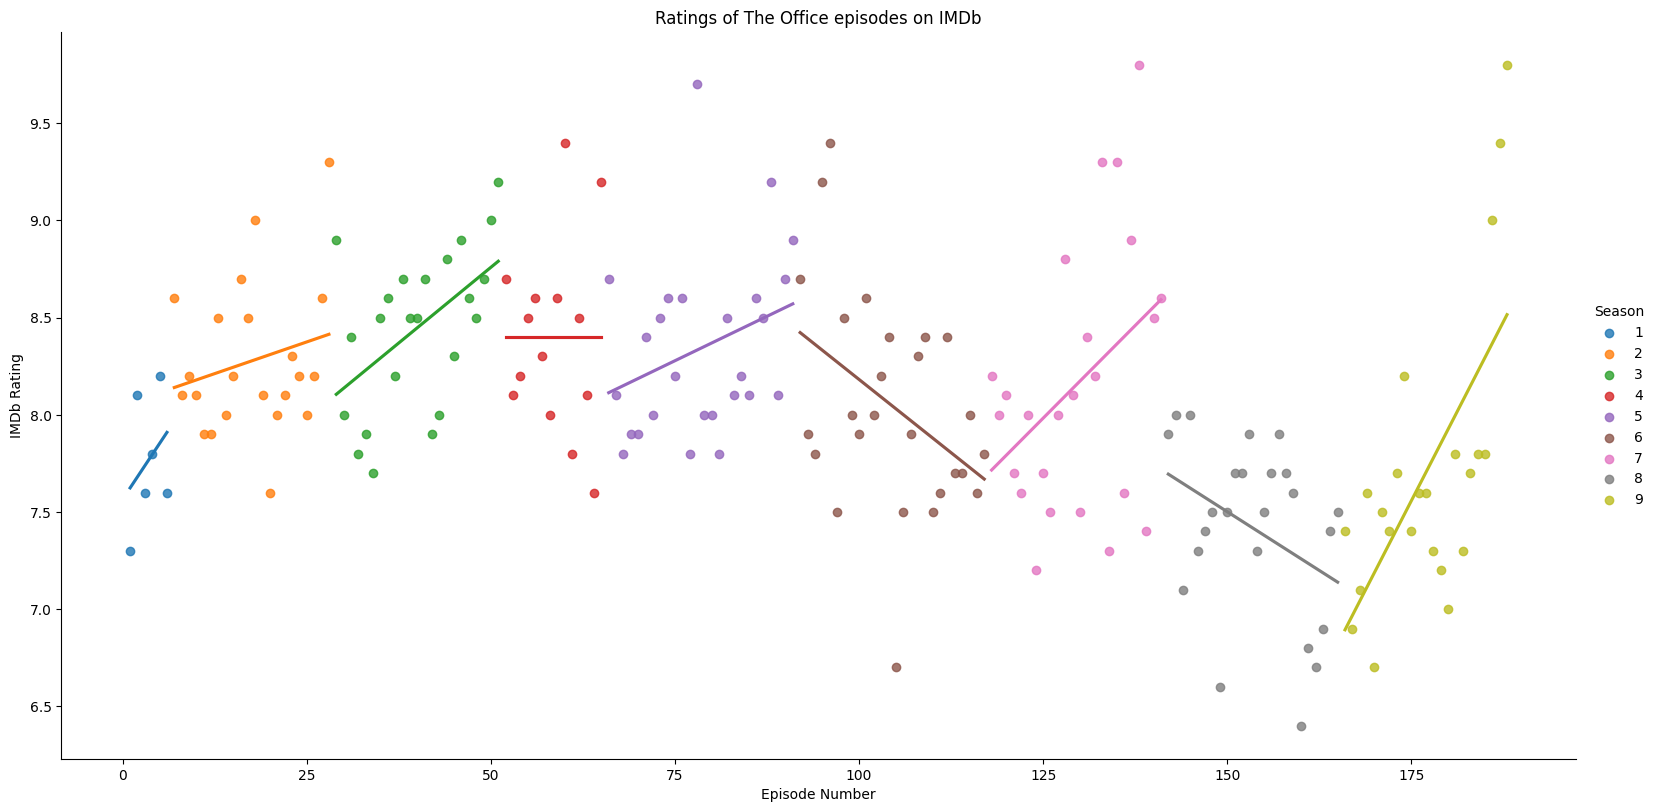

In [14]:
# Creating a plot for episode ratings
sns.lmplot(x="Episode No. (Overall)", y="Rating", hue="Season", data=the_office, height=8, aspect=2, ci=None)
plt.xlabel("Episode Number")
plt.ylabel("IMDb Rating")
plt.title("Ratings of The Office episodes on IMDb")

The straight lines on the graph indicate the overall trend in episode ratings - either increasing or decreasing. A quick glance shows that up to and including season 7, episode ratings were fairly stable, while episodes of seasons 8 and 9 are rated slightly lower - though in season 9 a sudden jump in ratings is observed for the last 3 episodes.

## Analysis of changes in the series' viewership

Next, I proceeded to analyze how the series' viewership has changed over time.
I started by calculating the average viewership of each season.

In [15]:
# Grouping data by the "Season" column and calculating the average viewership based on the "Rating" column
average_viewership = the_office.groupby('Season')['Viewership'].mean().round(2)

# Displaying the average viewership for each season
for season in the_office['Season'].unique():
    average = average_viewership.loc[season]
    print(f"Season \033[1m{season}\033[0m: average viewership (in millions) = \033[1m{average}\033[0m")

Season 1: average viewership (in millions) = 6.37
Season 2: average viewership (in millions) = 8.17
Season 3: average viewership (in millions) = 8.49
Season 4: average viewership (in millions) = 8.55
Season 5: average viewership (in millions) = 8.76
Season 6: average viewership (in millions) = 7.77
Season 7: average viewership (in millions) = 7.31
Season 8: average viewership (in millions) = 5.39
Season 9: average viewership (in millions) = 4.14


It is evident that viewership drops significantly in seasons 8 and 9. I have also presented this in graphs - first on a bar chart created using the plt.bar function from the Matplotlib library.

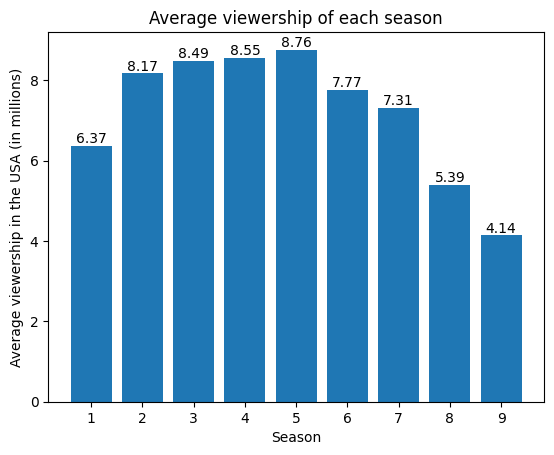

In [17]:
# Preparing data for the plot
seasons = the_office['Season'].unique()
average_values = average_viewership.values

# Creating a bar plot
plt.bar(seasons, average_values)

# Adding title and axis labels to the plot
plt.title("Average viewership of each season")
plt.xlabel("Season")
plt.ylabel("Average viewership in the USA (in millions)")

# Adjusting x-axis labels
plt.xticks(seasons, seasons)

# Adding values to the bars
for i, value in enumerate(average_values):
    plt.text(seasons[i], value, str(value), ha='center', va='bottom')

# Displaying the plot
plt.show()


I also created a plot showing the viewership of each episode in each season.

Text(0.5, 1.0, 'Viewership of The Office over time')

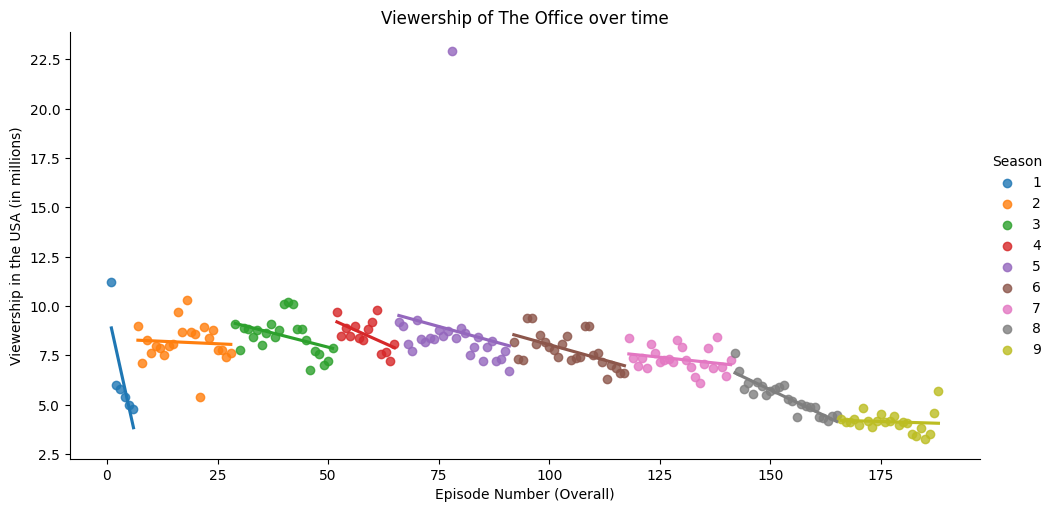

In [18]:
# Creating a scatter plot for viewership
sns.lmplot(x="Episode No. (Overall)", y="Viewership", hue="Season", data=the_office, height=5, aspect=2, ci=None)
plt.xlabel("Episode Number (Overall)")
plt.ylabel("Viewership in the USA (in millions)")
plt.title("Viewership of The Office over time")

Besides showing a clear and progressive decline in viewership over time, the chart also shows an outlier in season 5 (in purple) - this looks rather suspicious, so I checked to see if it might be an error in the data.



In [20]:
# Filtering data for season 5
season_5 = the_office[the_office['Season'] == 5]

# Finding the index of the episode with the highest viewership
max_viewership_index = season_5['Viewership'].idxmax()

# Retrieving values of the "Title" and "Episode No." columns for the episode with the highest viewership
episode_title = season_5.loc[max_viewership_index, 'Title']
episode_number = season_5.loc[max_viewership_index, 'Episode No.']

# Displaying information about the episode
print("Episode with the highest viewership in Season 5:")
print("Title:", episode_title)
print("Episode Number:", episode_number)

Episode with the highest viewership in Season 5:
Title: Stress Relief
Episode Number: 13


While it seems almost unbelievable that one episode would so significantly stand out from the others in terms of viewership and yet not be the final episode, this is not an error in the data - according to information from the IMDb website: "Due to the fact that the episode "Stress Relief" was aired after the Super Bowl, it drew more than 20 million viewers to their screens, making it the most watched episode of the entire series."
The episode originally aired on NBC in the United States on February 1, 2009, immediately after the Super Bowl XLIII broadcast. The decision to air the episode just after the event was made because of the positive feedback the series received after short commercials aired during the 2008 Summer Olympics.
Lieberstein (one of the scriptwriters of the episode) admitted that when creating the episode's script, he tried to attract new viewers and encourage them to watch the series regularly, while not excluding loyal fans. Thus, the script intentionally did not focus on ongoing plot threads that had been unknown to new viewers for several seasons. So essentially they wrote a new "Pilot" episode.

I also assessed whether Steve Carell's presence really had an impact on the series' viewership.

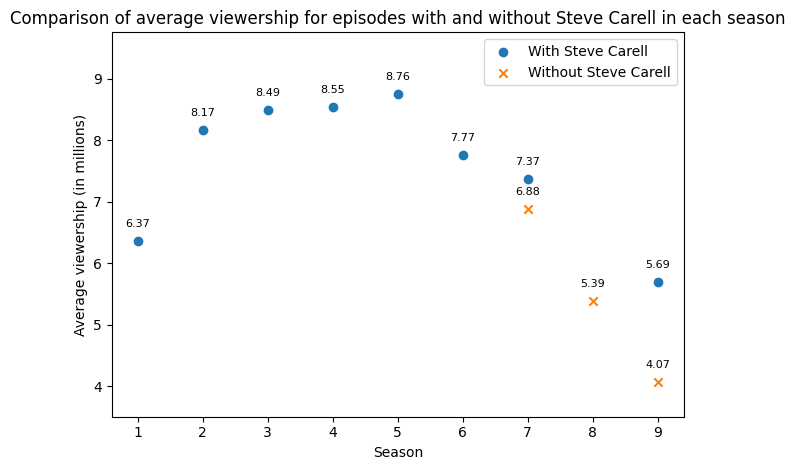

In [21]:
# Grouping data by seasons and calculating the average viewership for episodes with and without Steve Carell
average_viewership_with_carell = the_office.loc[the_office['Michael Scott (Steve Carell)'] == True].groupby('Season')['Viewership'].mean()
average_viewership_without_carell = the_office.loc[the_office['Michael Scott (Steve Carell)'] == False].groupby('Season')['Viewership'].mean()

# Setting the y-axis range
plt.ylim(3.5, max(max(average_viewership_with_carell), max(average_viewership_without_carell)) + 1)

# Generating a scatter plot
plt.scatter(average_viewership_with_carell.index, average_viewership_with_carell, marker='o',
            label='With Steve Carell')
plt.scatter(average_viewership_without_carell.index, average_viewership_without_carell, marker='x',
            label='Without Steve Carell')
plt.xlabel('Season')
plt.ylabel('Average viewership (in millions)')
plt.title('Comparison of average viewership for episodes with and without Steve Carell in each season')

# Displaying values next to the dots
for i, viewership in enumerate(average_viewership_with_carell):
    plt.annotate(round(viewership, 2), (average_viewership_with_carell.index[i], viewership),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Displaying values next to the crosses
for i, viewership in enumerate(average_viewership_without_carell):
    plt.annotate(round(viewership, 2), (average_viewership_without_carell.index[i], viewership),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.legend()
plt.show()


The plot shows a clear drop in viewership for episodes without Steve Carell. In the final season, he only appears in the last episode (and basically says only a few words), and yet the viewership for this episode is significantly higher - though of course this may also be influenced by the fact that it is the final episode, wrapping up the entire series.

## Analysis of episode descriptions

In the last part of the analysis of this data set, I have taken episode descriptions under the microscope.

For this part of the analysis, additional resources from the nltk (Natural Language Toolkit) library were needed:

*   word_tokenize - is used for tokenization, i.e. splitting the text into individual words (tokens).
*   stopwords - defines "stop" words in different languages. Stop words are words that occur in sentences with very high frequency, but carry little value - in English, for example, these words are "a", "an", "the", "is", "in", etc. The stopwords function allows to retrieve a list of stopwords for a given language and remove them from the analyzed content.
*   FreqDist - allows you to calculate the frequency of occurrence of particular words in a given dataset.


In addition, I used the re module (Regular Expressions) which is part of the standard Python library.


Before analyzing the text, it is required to prepare the data properly. This includes converting uppercase letters to lowercase, removing all punctuation and special characters, tokenizing words, removing stopwords and lemmatizing words.

In [22]:
# Data Preparation
description_list = []
for description in the_office.About:
    description = re.sub("[^a-zA-Z]", " ", description)  # Remove punctuation and special characters
    description = description.lower()  # Convert to lowercase
    description = nltk.word_tokenize(description)  # Tokenize words (split into individual words)
    description = [word for word in description if not word in set(stopwords.words("english"))]  # Remove stopwords
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]  # Lemmatize words
    description = " ".join(description)
    description_list.append(description)

In [23]:
# Create "new_about" column with data prepared for analysis
the_office["new_about"]=description_list
the_office.head()

,Season,Episode No.,Episode No. (Overall),Title,Airdate,Rating,Votes,Viewership,Duration,Michael Scott (Steve Carell),About,new_about
0,1,1,1,Pilot,2005-03-24,7.3,9283,11.2,23,True,The premiere episode introduces the boss and s...,premiere episode introduces bos staff dunder m...
1,1,2,2,Diversity Day,2005-03-16,8.1,9169,6.0,23,True,Michael's off color remark puts a sensitivity ...,michael color remark put sensitivity trainer o...
2,1,3,3,Health Care,2005-04-05,7.6,7611,5.8,22,True,Michael leaves Dwight in charge of picking the...,michael leaf dwight charge picking new healthc...
3,1,4,4,The Alliance,2005-04-12,7.8,7344,5.4,23,True,"Just for a laugh, Jim agrees to an alliance wi...",laugh jim agrees alliance dwight regarding dow...
4,1,5,5,Basketball,2005-04-19,8.2,8154,5.0,23,True,Michael and his staff challenge the warehouse ...,michael staff challenge warehouse worker baske...


In [24]:
# Create a FreqDist object based on the contents of the "new_about" column
freq_dist = FreqDist(' '.join(the_office['new_about']).split())

# Display the 10 most common words along with their frequencies
most_common_words = freq_dist.most_common(10)
for word, frequency in most_common_words:
    print(word, ":", frequency)

michael : 155
dwight : 101
jim : 92
office : 82
pam : 75
andy : 70
try : 55
dunder : 45
mifflin : 45
meanwhile : 45


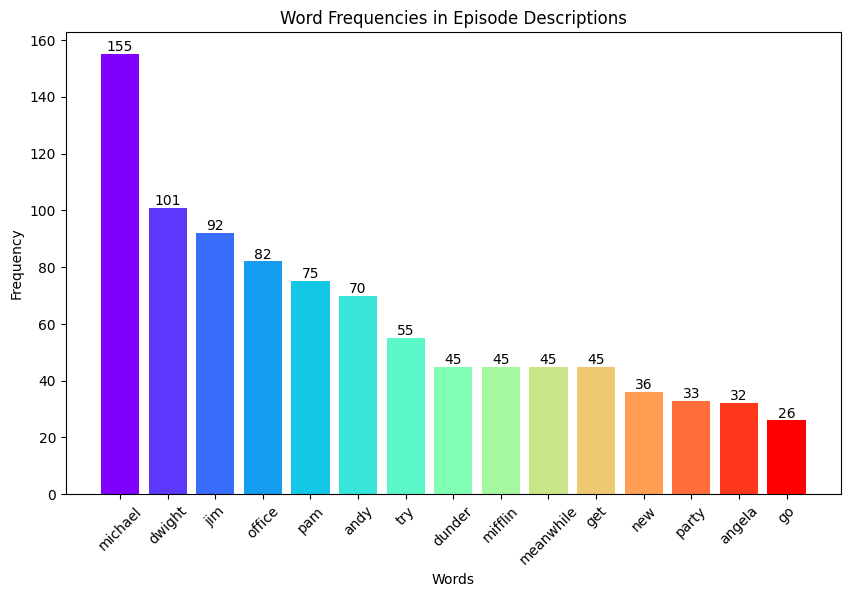

In [25]:
# Presenting the obtained results regarding word frequencies on a chart
labels = [word for word, _ in freq_dist.most_common(15)]  # Selecting the 15 most common words in episode descriptions
counts = [count for _, count in freq_dist.most_common(15)]  # Determining the frequency of occurrence of selected words

rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))  # Choosing "rainbow" colors for the chart

# Creating a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=rainbow_colors)

plt.title('Word Frequencies in Episode Descriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Adding labels for each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, counts[i], ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotating word labels by 45 degrees for better readability

plt.show()

The word that occurs most often in the descriptions of the episodes is Michael - it definitely outclasses the other words, despite the fact that the character Michael does not appear in as many as 49 episodes of the series! The next most common words are Dwight, Jim, office, Pam and Andy. The name of the company where the characters work - Dunder Mifflin - also appears frequently.

I also created a word cloud of the most common words in episode descriptions:

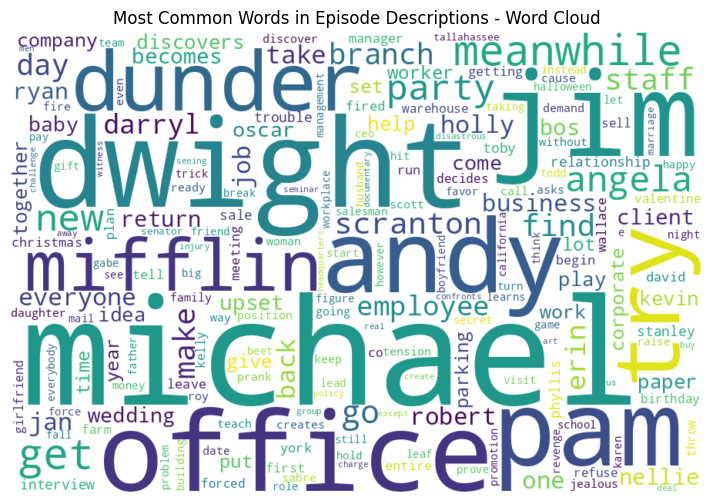

In [26]:
# Creating a word cloud based on the previously calculated frequencies
wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='viridis').generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Episode Descriptions - Word Cloud')
plt.show()

# The third data set

AI liked the word analysis so much that I decided to take it a step further. I was able to find a dataset containing all the dialogues from The Office series. I downloaded the data from https://data.world/abhinavr8/the-office-scripts-dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [28]:
dialogues = pd.read_csv("The_Office_lines.csv")
dialogues.head(3)

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False


In [29]:
dialogues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59909 entries, 0 to 59908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         59909 non-null  int64 
 1   season     59909 non-null  int64 
 2   episode    59909 non-null  int64 
 3   scene      59909 non-null  int64 
 4   line_text  59909 non-null  object
 5   speaker    59909 non-null  object
 6   deleted    59909 non-null  bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 2.8+ MB


The "dialogues" data frame contains information taken from the script of the TV series "The Office." It consists of the following columns:

    "id": identifier of each line spoken by the characters.
    "season": the number of the season in which the line was spoken.
    "episode": the episode number.
    "scene": the number of the scene.
    "line_text": the line spoken by the character.
    "speaker": the name of the character who speaks the given line.
    "deleted": True/False information indicating whether the line has been removed from the final version of the script.


## Data cleaning

Since this is a large text dataset, it was necessary to clean the data before proceeding with the analysis. Data cleaning included:
  - removing stage directions enclosed in square brackets, e.g. [Phone ringing].
  - removing spaces that may be at the ends of lines
  - eliminating errors in the spelling of individual characters' names, which can lead to the identification of one character with different names
  - replacing capital letters with lowercase letters

In [30]:
# Removing square brackets annotations e.g., [Laughing] and trailing spaces at the end of lines
# Converting uppercase letters to lowercase letters in columns containing character names and their lines

dialogues['speaker'] = dialogues['speaker'].str.replace(r'\[.*?\]', '').str.strip().str.lower()
dialogues['line_text'] = dialogues['line_text'].str.replace(r'\[.*?\]', '').str.strip().str.lower()

In [31]:
# Displaying the number of unique speakers
unique_speakers = dialogues['speaker'].nunique()
unique_speakers

755

As it can be seen, a great many characters appear in the series. However, the analysis will not focus on all of them - I am mostly interested in the most popular characters in the series, therefore, I have picked out 10 characters who speak the most lines.

In [ ]:
dialogues['speaker'].value_counts().head(10)

michael    12151
dwight      7535
jim         6817
pam         5380
andy        3969
kevin       1709
angela      1695
oscar       1491
erin        1469
ryan        1379
Name: speaker, dtype: int64

The 5 most important characters in the series "The Office" (in descending order of number of lines) are Michael, Dwight, Jim, Pam, Andy. It can be perfectly seen in the bar chart how much the other characters "differ" from these characters:

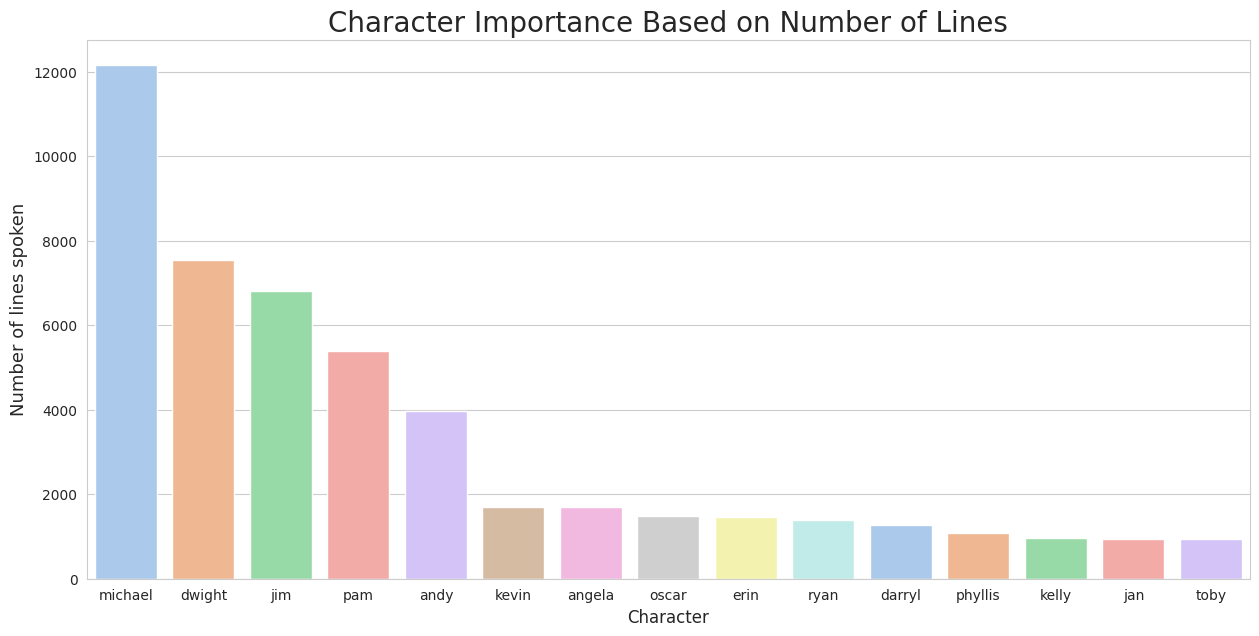

In [33]:
# Plot showing the number of lines spoken by each character (top 15 characters by number of lines)
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))
sns.countplot(x='speaker', data=dialogues, order=dialogues.speaker.value_counts().iloc[:15].index, palette="pastel")
plt.xlabel('Character', fontsize=12)
plt.ylabel('Number of lines spoken', fontsize=13)
plt.title('Character Importance Based on Number of Lines', fontsize=20)
plt.show()

As expected, Michael Scott had the highest number of lines in the series. However, his name, and the name Dwight, are quite problematic to write down compared to the others (Jim/Pam/Andy) and it's easy to make a typo in them - so I checked if the spelling errors of these names are present in this data set.

In [34]:
# Selecting rows from the DataFrame that contain the character sequence 'mic' or 'ael' and displaying unique values
michael_variants = dialogues[dialogues['speaker'].str.contains('mic|ael')]
michael_variants['speaker'].unique()

array(['michael', 'michael and dwight', 'dwight and michael',
       'michael and christian', 'michael and jim',
       'phyllis, meredith, michael, kevin', 'young michael', 'm ichael',
       'michael & dwight', 'andy & michael', 'andy and michael',
       "michael's ad", 'michae', 'michael/dwight', 'michael and darryl',
       'woman on mic', 'micheal', 'michael & holly', 'michael and holly',
       'michael, holly, and darryl', 'holly & michael', 'michel',
       'warehouse michael', 'jim, pam, michael and dwight', 'michal',
       'michael, pam & ryan', 'michael and erin',
       'dwight, jim and michael', 'miichael', 'michael and donna',
       'mihael', 'michael and andy', 'ryan and michael', 'video michael',
       'deangelo/michael'], dtype=object)

In [35]:
# Displaying only those 'names' that do not contain the word 'michael'
michael_variants_filtered = michael_variants[~michael_variants['speaker'].str.contains('michael')]
michael_variants_filtered['speaker'].value_counts()

micheal         8
michel          4
m ichael        1
michae          1
woman on mic    1
michal          1
miichael        1
mihael          1
Name: speaker, dtype: int64

I identified as many as 7 incorrect versions of the name Michael - micheal, michel, m ichael, michae, michal, miichael, mihael - and replaced them with the correctly spelled version:

In [36]:
# Replacing all incorrect versions with the word "michael"
invalid_variants = ['micheal', 'michel', 'm ichael', 'michae', 'michal', 'miichael', 'mihael']
dialogues['speaker'] = dialogues['speaker'].str.replace(r'\b(?:' + '|'.join(invalid_variants) + r')\b', 'michael')

In [38]:
# Checking if all words with typos have been replaced [only "woman on mic" should remain]
michael_variants = dialogues[dialogues['speaker'].str.contains('mic|ael')]
michael_variants_filtered = michael_variants[~michael_variants['speaker'].str.contains('michael')]
michael_variants_filtered

,id,season,episode,scene,line_text,speaker,deleted
21898,21899,4,13,37,the job fair will be closing in five minutes. ...,woman on mic,False


In [39]:
dialogues['speaker'].value_counts().head(1)

michael    12168
Name: speaker, dtype: int64

Before replacing words with typos, the total number of lines spoken by Michael was 12151, and after the changes it was 12168 - so the typing errors were not particularly numerous in relation to the total volume of data, and would be unlikely to affect the analysis. However, with smaller data sets such typos could have a big impact.

I also checked if such a problem does occur with the name Dwight.

In [40]:
dwight_variants = dialogues[dialogues['speaker'].str.contains('dwi|ght|ight')]
print(dwight_variants['speaker'].unique())
dwight_variants_filtered = dwight_variants[~dwight_variants['speaker'].str.contains('dwight')]
dwight_variants_filtered

['dwight' 'michael and dwight' 'dwight and michael' 'dwight and roy'
 'jim and dwight' 'jim, josh, and dwight' 'michael & dwight'
 'dwightkschrute' 'michael/dwight' 'angela and dwight'
 'prince granddaughter' 'jim, pam, michael and dwight' 'dwight and erin'
 'dwight and andy' 'dwight & andy' 'dwight, jim & pam' 'andy and dwight'
 'dwight, jim and michael' 'night cleaning crew' 'dwight and angela'
 'employees except dwight' 'dwight & nate' 'phyllis, stanley, dwight'
 'dwight, erin, jim & kevin' 'pam & dwight' 'jim & dwight']


,id,season,episode,scene,line_text,speaker,deleted
26543,26544,5,12,13,"grandma, i can't do this.",prince granddaughter,False
26545,26546,5,12,13,right.,prince granddaughter,False
26547,26548,5,12,13,8,prince granddaughter,False
26599,26600,5,12,20,its all better.,prince granddaughter,False
36260,36261,6,17,37,"oh! sorry! sorry, sorry.",night cleaning crew,False


I did not detect any typos in the name "dwight". The names Jim, Pam and Andy are so short that it is unlikely to make mistakes in them.

I have also replaced the '&' sign appearing in the 'speakers' column with the word 'and', as I noticed that they are used interchangeably.

In [41]:
dialogues['speaker'] = dialogues['speaker'].str.replace('&', 'and')

# Analysis of data

## Analysis of the data set in terms of number of lines and number of words

I began my analysis by identifying the 5 characters who spoke the most lines in each season.

In [42]:
# Calculating the number of lines for each character in each season
speaker_lines_per_season = dialogues.groupby(['season', 'speaker']).size().rename('number_of_lines').reset_index()

# Calculating the total number of lines for each season
total_lines_per_season = speaker_lines_per_season.groupby('season')['number_of_lines'].sum()

# Identifying the top 5 characters from each season who had the most lines
top_5_speakers_per_season = (
    speaker_lines_per_season
    .sort_values(['season', 'number_of_lines'], ascending=[True, False])
    .groupby('season')
    .head(5)
    .set_index(['season', 'speaker'])
)
top_5_speakers_per_season.head()

number_of_lines
season speaker                 
1      michael              643
       dwight               326
       jim                  285
       pam                  219
       katy                  73

In [43]:
# Calculating the percentage share of lines spoken by the top 5 selected characters in all lines
top_5_speakers_per_season['percentage_share'] = (
    top_5_speakers_per_season.groupby('season')['number_of_lines']
    .apply(lambda x: (x / total_lines_per_season[x.name] * 100).round(decimals=2))
)

# Displaying the updated DataFrame
top_5_speakers_per_season

number_of_lines  percentage_share
season speaker                                   
1      michael              643             32.21
       dwight               326             16.33
       jim                  285             14.28
       pam                  219             10.97
       katy                  73              3.66
2      michael             2324             31.02
       dwight              1114             14.87
       jim                  906             12.09
       pam                  729              9.73
       jan                  285              3.80
3      michael             1993             26.63
       dwight               941             12.58
       jim                  783             10.46
       pam                  665              8.89
       andy                 391              5.23
4      michael             1637             29.01
       jim                  684             12.12
       dwight               547              9.70
       pam                  528              9.36
       ryan                 228              4.04
5      michael             2173             26.60
       dwight              1076             13.17
       jim                  877             10.73
       pam                  710              8.69
       andy                 497              6.08
6      michael             1989             26.07
       jim                  928             12.16
       dwight               812             10.64
       pam                  706              9.25
       andy                 538              7.05
7      michael             1407             19.27
       dwight               704              9.64
       jim                  687              9.41
       pam                  613              8.39
       andy                 557              7.63
8      andy                1125             15.88
       dwight               946             13.36
       jim                  869             12.27
       pam                  475              6.71
       erin                 427              6.03
9      dwight              1069             15.03
       jim                  798             11.22
       pam                  735             10.34
       andy                 638              8.97
       angela               381              5.36

Based on this data frame, it's easy to see that until season 7, Michael played by Steve Carell had the highest percentage of lines spoken by all characters - often the percentage exceeded 25%. The second and third places were usually taken by Jim and Dwight (in varying order). In season 8, Andy has the most number of lines, while in season 9 it was Dwight.

I also calculated the total number of words spoken by each character and presented the results on a graph.

In [44]:
# Adding a new column containing the number of words in each line
dialogues['dialogue_wordcount'] = dialogues['line_text'].map(lambda x: len(re.findall(r'\w+', x)))
dialogues.head(3)

,id,season,episode,scene,line_text,speaker,deleted,dialogue_wordcount
0,1,1,1,1,all right jim. your quarterlies look very good...,michael,False,14
1,2,1,1,1,"oh, i told you. i couldn't close it. so...",jim,False,10
2,3,1,1,1,so you've come to the master for guidance? is ...,michael,False,16


In [46]:
# Calculating the total number of words spoken by each character
total_char_words = dialogues.groupby('speaker', as_index=False)['dialogue_wordcount'].sum()
total_char_words = total_char_words.sort_values('dialogue_wordcount', ascending=False)
total_char_words.head(3)

,speaker,dialogue_wordcount
431,michael,176306
204,dwight,88152
332,jim,66206


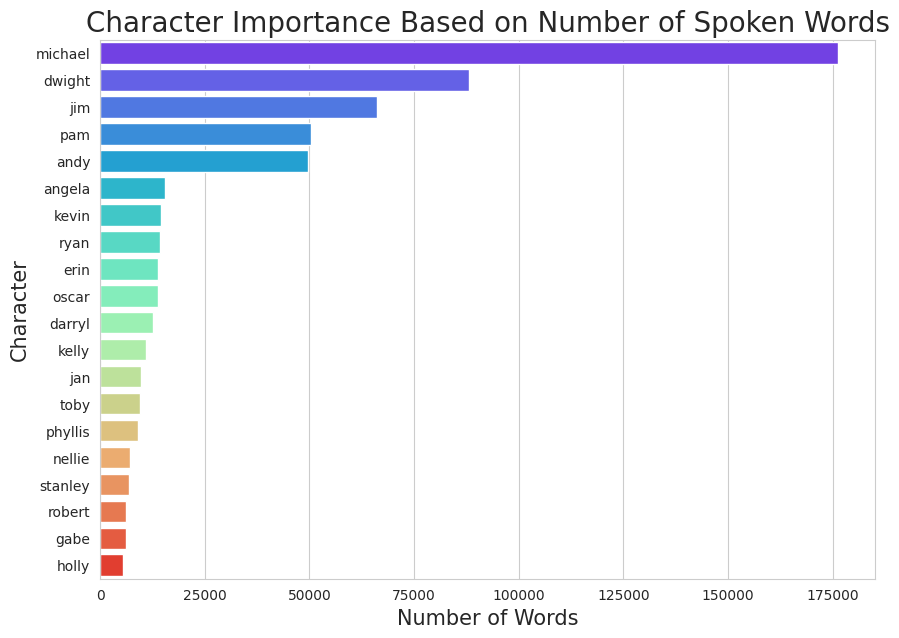

In [47]:
# Presenting the obtained data on a plot (for the top 20 characters who spoke the most words)
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(x='dialogue_wordcount', y='speaker', data=total_char_words.head(20), palette="rainbow", order=total_char_words.head(20)['speaker'], orient='h')
plt.xlabel('Number of Words', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.title('Character Importance Based on Number of Spoken Words', fontsize=20);

The data obtained matches the chart, which shows an analysis of the importance of characters based on the number of lines they speak - the top five still include Michael, Dwight, Jim, Pam and Andy.

## Analysis of words in the script of the series

I then proceeded to analyze the words that occur most often in the series. To do this, it was necessary to adequately prepare the lines spoken by the characters - in a similar way to the descriptions of the episodes. In addition, I excluded words that contained less than 3 characters.

In [48]:
dialogues_list = []
for line in dialogues.line_text:
    line = re.sub("[^a-zA-Z]", " ", line)
    line = nltk.word_tokenize(line)
    line = [word for word in line if len(word) > 2 and not word in set(stopwords.words("english"))]
    lemma = nltk.WordNetLemmatizer()
    line = [lemma.lemmatize(word) for word in line]
    line = " ".join(line)
    dialogues_list.append(line)

In [49]:
dialogues['line_text_processed'] = dialogues_list
dialogues.head()

,id,season,episode,scene,line_text,speaker,deleted,dialogue_wordcount,line_text_processed
0,1,1,1,1,all right jim. your quarterlies look very good...,michael,False,14,right jim quarterly look good thing library
1,2,1,1,1,"oh, i told you. i couldn't close it. so...",jim,False,10,told close
2,3,1,1,1,so you've come to the master for guidance? is ...,michael,False,16,come master guidance saying grasshopper
3,4,1,1,1,"actually, you called me in here, but yeah.",jim,False,8,actually called yeah
4,5,1,1,1,"all right. well, let me show you how it's done.",michael,False,11,right well let show done


In [50]:
# Creating a list of individual words
filtered_words = [word for word in ' '.join(dialogues['line_text_processed']).split()]

# Creating a FreqDist object based on the filtered words
freq_distance = FreqDist(filtered_words)

# Displaying the 20 most frequently occurring words along with their frequencies
most_frequent_words = freq_distance.most_common(20)
for word, frequency in most_frequent_words:
    print(word, ":", frequency)

know : 4557
like : 3410
yeah : 3223
okay : 2974
get : 2750
right : 2695
well : 2507
hey : 2422
think : 2350
good : 2233
one : 2176
michael : 2135
want : 2063
really : 2026
going : 1982
yes : 1722
would : 1716
got : 1704
guy : 1619
let : 1601


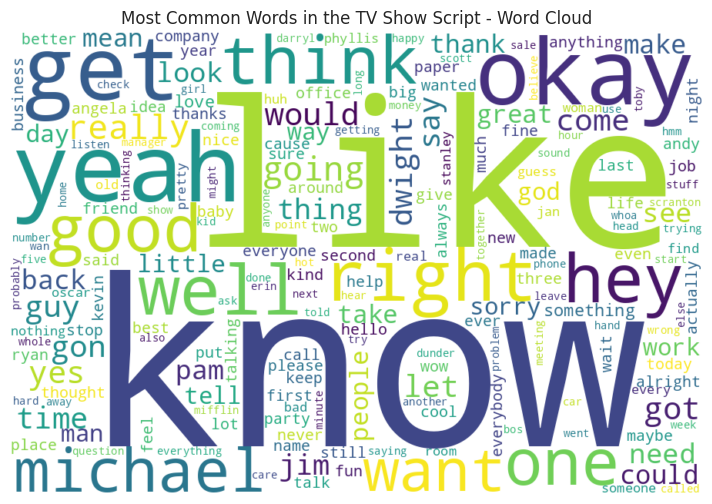

In [51]:
# Word cloud
wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='viridis').generate_from_frequencies(freq_distance)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in the TV Show Script - Word Cloud')
plt.show()

I also decided to check what pairs of words appear most often in the questions spoken by the characters - for this purpose I used the bigrams function from the NLTK library.

In [52]:
# Creating bigrams based on the content of the "line_text_processed" column
text = ' '.join(dialogues['line_text_processed'])
text_bigrams = list(bigrams(text.split()))

# Creating a FreqDist object based on the bigrams
freq_distance_bigrams = FreqDist(text_bigrams)

# Displaying the 20 most frequently occurring word pairs along with their frequencies
most_common_bigrams = freq_distance_bigrams.most_common(20)
for bigram, frequency in most_common_bigrams:
    print(bigram, ":", frequency)

('hey', 'hey') : 332
('dunder', 'mifflin') : 320
('would', 'like') : 249
('michael', 'scott') : 211
('yeah', 'yeah') : 206
('okay', 'okay') : 200
('look', 'like') : 181
('know', 'know') : 179
('let', 'get') : 161
('feel', 'like') : 157
('yes', 'yes') : 155
('little', 'bit') : 155
('right', 'right') : 131
('get', 'back') : 123
('new', 'york') : 122
('yeah', 'know') : 119
('good', 'good') : 116
('well', 'know') : 113
('dwight', 'schrute') : 111
('whoa', 'whoa') : 111


No big surprise here - one of the most common word pairs is the name of the company where the series takes place - Dunder Mifflin. There are also two character names that appear - Michael Scott and Dwight Shrute. In addition, I checked how the results look after excluding bigrams that consist of two identical words (e.g., "yes yes"), and presented them in the chart.

In [56]:
# Creating bigrams based on the content of the "line_text_processed" column
text = ' '.join(dialogues['line_text_processed'])
text_bigrams2 = list(bigrams(text.split()))

# Creating a FreqDist object based on the bigrams (excluding repetitions)
freq_distance_bigrams2 = FreqDist(bigram for bigram in text_bigrams2 if bigram[0] != bigram[1])

# Displaying the 20 most frequently occurring word pairs along with their frequencies
most_common_bigrams2 = freq_distance_bigrams2.most_common(20)
for bigram, frequency in most_common_bigrams2:
    print(bigram, ":", frequency)

('dunder', 'mifflin') : 320
('would', 'like') : 249
('michael', 'scott') : 211
('look', 'like') : 181
('let', 'get') : 161
('feel', 'like') : 157
('little', 'bit') : 155
('get', 'back') : 123
('new', 'york') : 122
('yeah', 'know') : 119
('well', 'know') : 113
('dwight', 'schrute') : 111
('hey', 'guy') : 107
('yeah', 'well') : 103
('thank', 'much') : 101
('come', 'back') : 101
('okay', 'well') : 100
('conference', 'room') : 99
('okay', 'know') : 97
('let', 'see') : 94


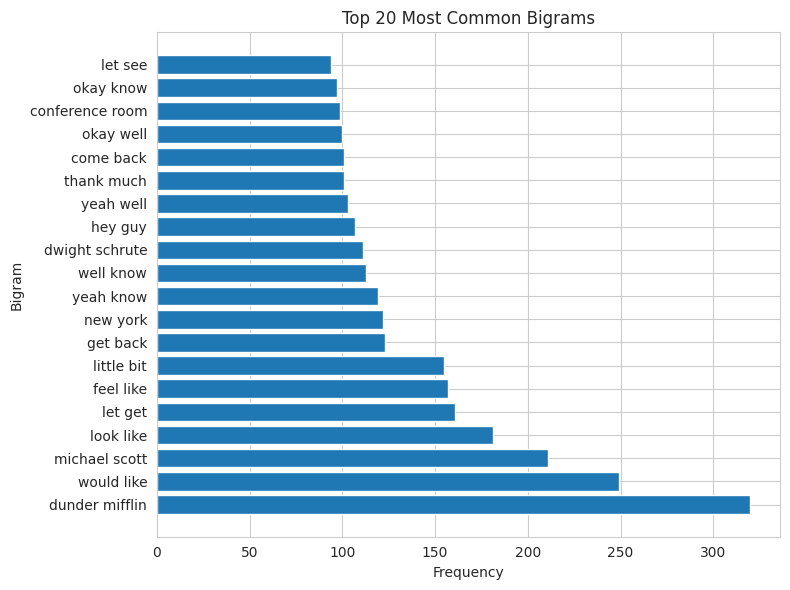

In [57]:
# Retrieving data for the plot
bigrams2, frequencies2 = zip(*most_common_bigrams2)
bigrams2 = [' '.join(bigram) for bigram in bigrams2]  # Converting bigrams to strings

# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.barh(bigrams2, frequencies2)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 20 Most Common Bigrams')
plt.tight_layout()  # Adjusting spacing between plot elements
plt.show()

No new characters appeared in the presented results. I additionally checked the trigrams in the data. For this purpose, I used the ngrams function.

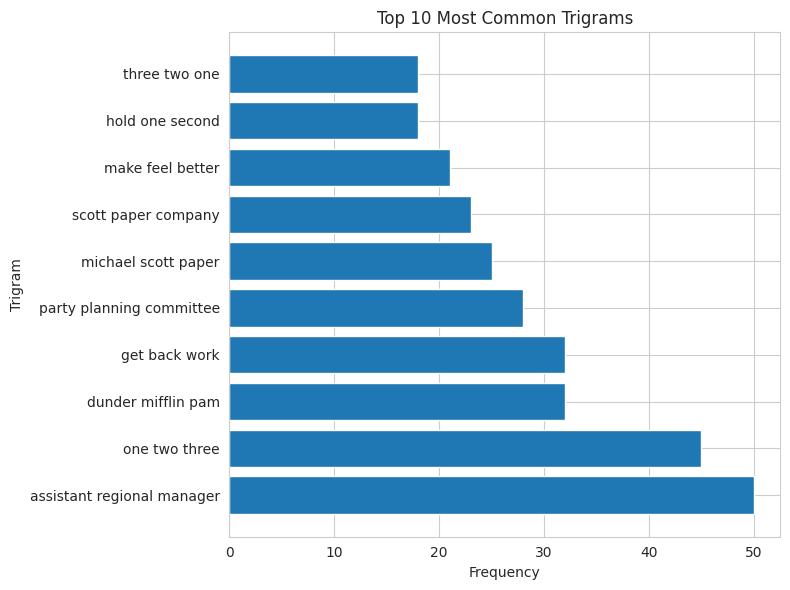

In [58]:
# Creating trigrams based on the content of the "line_text_processed" column
text = ' '.join(dialogues['line_text_processed'])
text_trigrams = list(ngrams(text.split(), 3))

# Creating a FreqDist object based on the trigrams (excluding repetitions)
freq_distance_trigrams = FreqDist(trigram for trigram in text_trigrams if len(set(trigram)) > 1)

# Displaying the 10 most frequently occurring trigrams along with their frequencies
most_common_trigrams = freq_distance_trigrams.most_common(10)

# Retrieving data for the plot
trigrams, frequencies = zip(*most_common_trigrams)
trigrams = [' '.join(trigram) for trigram in trigrams]  # Converting trigrams to strings

# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.barh(trigrams, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.title('Top 10 Most Common Trigrams')
plt.tight_layout()  # Adjusting spacing between plot elements
plt.show()


I also wanted to assess how many times the famous line "That's what she said" was spoken in the series and whether it was spoken exclusively by Michael. This line has become one of the most recognizable jokes associated with the series "The Office". It is tied to the character of Michael Scott, who became famous for saying this phrase, which is usually very inappropriate in a given situation, making people confused and embarrassed.

In [59]:
# Calculating the number of occurrences of the phrase "That's what she said"
count = dialogues['line_text'].str.count("that's what she said").sum()

# Displaying the result
print("Number of occurrences of the phrase 'That's what she said':", count)

Number of occurrences of the phrase 'That's what she said': 40


In [60]:
# Obtaining detailed information about when the line "That's what she said" was spoken and who said it
she_said = dialogues[dialogues['line_text'].str.contains("that's what she said")]
she_said = she_said[['speaker', 'season', 'episode']].sort_values(by='season').reset_index(drop=True)
she_said.head(3)

,speaker,season,episode
0,michael,2,2
1,jim,2,2
2,michael,2,2


In [61]:
# Identifying the characters who spoke the line
she_said["speaker"].value_counts()

michael                25
dwight                  3
jim                     2
everyone                1
jan                     1
stanley                 1
deposition reporter     1
pam                     1
david                   1
holly                   1
creed                   1
Name: speaker, dtype: int64

In [62]:
# Identifying the seasons in which the line was spoken
she_said["season"].value_counts()

4    10
2     8
3     8
5     5
7     4
9     2
6     1
Name: season, dtype: int64

As can be seen, although this phrase has become a trademark saying for Michael Scott, he was not the only character to speak this line in the course of the series. Other characters also occasionally used the phrase, which usually resulted in a loud objection from Michael, who considered it to be "his" joke. The phrase was said as many as 10 times in season 4, while it did not appear at all in season 1, as that season largely followed the script of the original, British version of "The Office," and in season 8, which did not feature Michael's character.

Another of the humorous aspects in the series "The Office" was some sort of inconsistency regarding the name of the position assigned to Dwight by Michael Scott. Dwight insisted that his position was "Assistant Regional Manager," implying that he was the second in command. However, Michael, the manager, always corrected him, using the title "Assistant to the Regional Manager" to emphasize that Dwight is only his assistant and does not have full decision-making authority.

I checked how many times lines referring to both names of this one position were spoken in the series.

In [63]:
# Calculating the number of occurrences of the phrase "Assistant to the regional manager"
count2 = dialogues['line_text'].str.count("assistant to the regional manager").sum()

# Displaying the result
print("Number of occurrences of the phrase 'Assistant to the regional manager':", count2)

Number of occurrences of the phrase 'Assistant to the regional manager': 19


In [64]:
# Calculating the number of occurrences of the phrase "Assistant regional manager"
count3 = dialogues['line_text'].str.count("assistant regional manager").sum()

# Displaying the result
print("Number of occurrences of the phrase 'Assistant regional manager':", count3)

Number of occurrences of the phrase 'Assistant regional manager': 29


As you can see, there are 10 more lines with "Assistant regional manager" - so maybe Dwight wasn't just an assistant after all. ;)

## Sentiment analysis

Sentiment analysis involves assessing the emotional tone of a text. Sentiment analysis can be carried out, for example, using Natural Language Processing (NLP) libraries. One of them is the TextBlob library.

To perform the sentiment analysis, I selected the 5 characters previously identified as the characters with the highest number of lines, plus an additional 3 characters who often speak rather negative sentences, namely Phyllis (an elderly woman who has a critical opinion of her co-workers), Meredith (a character known for inappropriate behavior in the office) and Angela (the personification of hypocrisy).

In [65]:
# Function for sentiment analysis for each row
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# Selected characters
selected_characters = ['jim', 'michael', 'pam', 'andy', 'dwight', 'phyllis', 'meredith', 'angela']

# Creating a new column with the sentiment analysis value
dialogues['sentiment'] = dialogues.loc[dialogues['speaker'].isin(selected_characters), 'line_text_processed'].apply(analyze_sentiment)

# Displaying the results
dialogues[['speaker', 'line_text_processed', 'sentiment']].head()

,speaker,line_text_processed,sentiment
0,michael,right jim quarterly look good thing library,0.492857
1,jim,told close,0.000000
2,michael,come master guidance saying grasshopper,0.000000
3,jim,actually called yeah,0.000000
4,michael,right well let show done,0.285714


In this code, I used the analyze_sentiment function, which takes a text as an argument, creates a TextBlob object for the given text and calculates the sentiment on a scale from -1 to 1. Values close to -1 indicate negative sentiment, values close to 1 indicate positive sentiment, and values around 0 indicate neutral sentiment.

I then used the apply method along with the isin condition to select rows for several predefined characters. Sentiment analysis was conducted only for these rows, and the results were stored in a new "sentiment" column.

In [66]:
# Calculating the average sentiment for selected characters in each season
character_sentiment = dialogues.loc[dialogues['speaker'].isin(selected_characters)].groupby(['season', 'speaker'])['sentiment'].mean().round(2).reset_index()

# Creating a new dataframe
new_dataframe = character_sentiment.pivot(index='season', columns='speaker', values='sentiment')
new_dataframe.index.name = 'season'

# Displaying the new dataframe
new_dataframe


speaker,andy,angela,dwight,jim,meredith,michael,pam,phyllis
season,,,,,,,,
1,NaN,0.02,0.08,0.14,0.02,0.12,0.06,-0.11
2,NaN,0.02,0.07,0.10,0.08,0.09,0.07,0.06
3,0.06,-0.01,0.05,0.08,0.03,0.10,0.07,0.05
4,0.07,0.00,0.06,0.09,0.06,0.09,0.08,-0.02
5,0.07,0.04,0.06,0.08,0.02,0.10,0.07,0.06
6,0.05,0.03,0.05,0.10,0.01,0.09,0.09,0.03
7,0.07,0.05,0.08,0.09,0.08,0.10,0.08,0.12
8,0.08,0.07,0.07,0.09,0.00,NaN,0.12,0.04
9,0.06,0.06,0.07,0.10,0.04,0.12,0.08,0.06


*Note: NaN values indicate that a character did not appear in the specified season (Andy first appeared in season 3, and Michael was not present in any episode of season 8).*

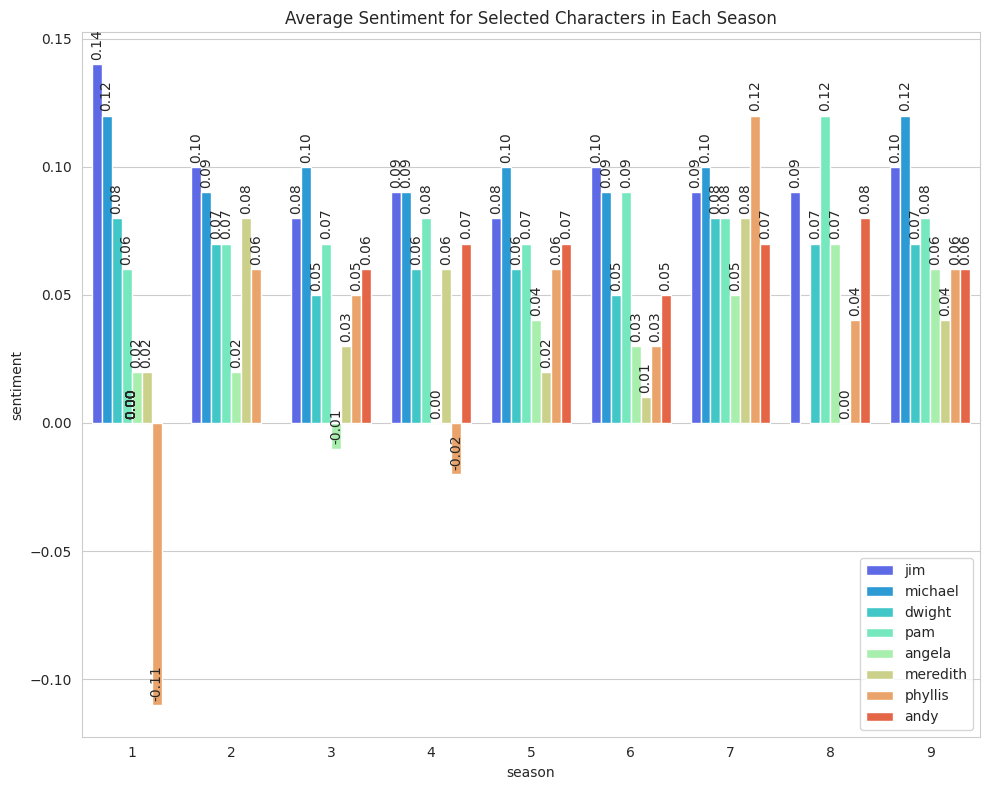

In [67]:
# Sorting the data
sorted_data = character_sentiment.sort_values(by=['season', 'sentiment'], ascending=[True, False])

# Creating a bar plot for each character
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=sorted_data, x='season', y='sentiment', hue='speaker', palette='rainbow')

# Adding labels for the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', rotation=90)

# Adding legend, title, and grid
ax.legend()
ax.set_title('Average Sentiment for Selected Characters in Each Season')
ax.yaxis.grid(True)

# Displaying the plot
plt.tight_layout()
plt.show()

As can be seen in the chart, the average of statements of all characters oscillates around zero - that is, statements that are neutral in tone. This is not particularly surprising - the series was intended to imitate the lives of real people working in the office. None of the characters were either villains or flawless heroes. I further checked which characters had the highest and lowest sentiment values observed for each season.

In [68]:
# Grouping the data by season and selecting characters (from the previously selected 8) with the highest and lowest sentiment values
max_sentiment_characters = sorted_data.loc[sorted_data.groupby('season')['sentiment'].idxmax()]
min_sentiment_characters = sorted_data.loc[sorted_data.groupby('season')['sentiment'].idxmin()]

# Creating a dataframe indicating the character with the highest sentiment for each season
max_sentiment_table = pd.DataFrame(max_sentiment_characters[['season', 'speaker', 'sentiment']])
max_sentiment_table = max_sentiment_table.set_index('season')

# Displaying the dataframe indicating the character with the highest sentiment for each season
print("Characters with the highest sentiment values:")
max_sentiment_table

Characters with the highest sentiment values:


,speaker,sentiment
season,,
1,jim,0.14
2,jim,0.10
3,michael,0.10
4,jim,0.09
5,michael,0.10
6,jim,0.10
7,phyllis,0.12
8,pam,0.12
9,michael,0.12


Calculations indicate that the most positive characters among those selected are Jim and Michael.

In [70]:
# Creating a dataframe indicating the character with the lowest sentiment for each season
min_sentiment_table = pd.DataFrame(min_sentiment_characters[['season', 'speaker', 'sentiment']])
min_sentiment_table = min_sentiment_table.set_index('season')

# Displaying the dataframe indicating the character with the lowest sentiment for each season
print("\nCharacters with the lowest sentiment values:")
min_sentiment_table


Characters with the lowest sentiment values:


,speaker,sentiment
season,,
1,phyllis,-0.11
2,angela,0.02
3,angela,-0.01
4,phyllis,-0.02
5,meredith,0.02
6,meredith,0.01
7,angela,0.05
8,meredith,0.00
9,meredith,0.04


As for the characters whose statements had the most negative tone, Meredith appears most often in the list, but Phyllis had the lowest score (however, it is interesting to note that she had the most positive lines in season 7).

I also evaluated the sentiment distribution; the histogram can be seen below:

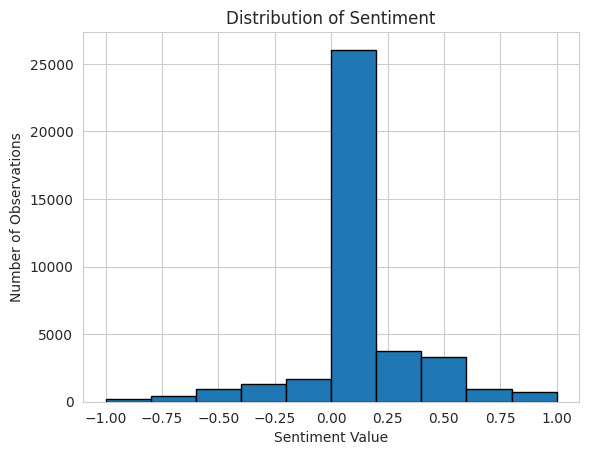

In [71]:
# Creating a histogram of sentiment
plt.hist(dialogues['sentiment'], bins=10, edgecolor='black')

# Adding title and axis labels
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment Value')
plt.ylabel('Number of Observations')

# Displaying the histogram
plt.show()

The histogram is slightly skewed to the right, indicating that although the protagonists' statements are largely neutral, they are of a more positive rather than negative tone.

I also decided to see what is the percentage of positively, negatively and neutrally charged statements in relation to the total number of lines spoken by the characters I selected. I considered neutral statements as lines with a sentiment value of 0, negative statements with a value less than 0, and positive statements with a value greater than 0.

In [73]:
# Extracting rows with positive sentiment
positive_dialogues = dialogues.loc[(dialogues['sentiment'] > 0)]

# Extracting rows with negative sentiment
negative_dialogues = dialogues.loc[(dialogues['sentiment'] < 0)]

# Extracting rows with neutral sentiment
neutral_dialogues = dialogues.loc[(dialogues['sentiment'] == 0)]

# Calculating the number of positive, negative, and neutral utterances for each character
positive_counts = positive_dialogues['speaker'].value_counts()
negative_counts = negative_dialogues['speaker'].value_counts()
neutral_counts = neutral_dialogues['speaker'].value_counts()
total_counts = positive_counts + negative_counts + neutral_counts

# Calculating the percentage share of positive and negative utterances for each character
positive_percentages = ((positive_counts / total_counts) * 100).round(2)
negative_percentages = ((negative_counts / total_counts) * 100).round(2)

# Creating a new dataframe with the results
result_df = pd.DataFrame({
    'speaker': positive_percentages.index,
    'negative': negative_percentages.values,
    'positive': positive_percentages.values
})

# Calculating results for neutral utterances
result_df['neutral'] = 100 - (result_df['positive'] + result_df['negative'])
result_df

,speaker,negative,positive,neutral
0,andy,13.23,31.49,55.28
1,angela,13.22,22.36,64.42
2,dwight,11.94,28.93,59.13
3,jim,10.20,33.97,55.83
4,meredith,12.40,25.12,62.48
5,michael,11.17,35.93,52.90
6,pam,10.59,30.50,58.91
7,phyllis,12.04,24.09,63.87


I presented the obtained values on a bar chart:

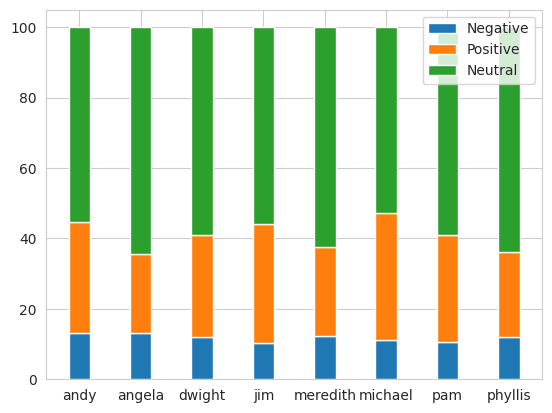

In [74]:
# Creating an index for the x-axis
x = np.arange(len(result_df))

# Width of a single bar
width = 0.35

# Creating the bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x, result_df['negative'], width, label='Negative')
rects2 = ax.bar(x, result_df['positive'], width, bottom=result_df['negative'], label='Positive')
rects3 = ax.bar(x, result_df['neutral'], width, bottom=result_df['negative'] + result_df['positive'], label='Neutral')

# Setting labels on the x-axis + adding legend
ax.set_xticks(x)
ax.set_xticklabels(result_df['speaker'])
ax.legend()

# Displaying the plot
plt.show()

As can be seen, in the vast majority of characters, neutral-toned statements strongly dominate - they exceed 50% in all instances. No character has a percentage of negative statements exceeding 14%. The highest percentage of positive statements was recorded for Micheal Scott - almost 36%, while the lowest for Angela - 22.36%.

# Conclusions

The data analysis conducted indicates that the character of Michael Scott, played by Steve Carell, had an unusually large impact on the reception of the series. From the data collected, it appears that Michael Scott was the character who spoke the most words and lines in the entire series "The Office." His characteristic style of communication, full of humor, sometimes controversy and unusual jokes, contributed to the unique dynamics and appeal of the series. Once Steve Carell was excluded from the series, the show's viewership dropped significantly. This suggests that his presence was a key factor in attracting viewers and keeping them interested. Michael was a very colorful character - he was prone to exaggerated reactions, able to go from extreme euphoria to gloom in a very short period of time. In addition, Michael was not the stereotypical all-knowing boss - he often faced uncomfortable situations, such as conflicts with co-workers, difficulties in managing a team or problems in establishing relationships, which made his character more "alive." As a result, although Michael Scott sometimes behaved inappropriately and controversially, he was a positive character with whom viewers established a fairly strong emotional bond. When the producers of the series did not offer Steve Carell a contract extension, many viewers stopped watching the show, as the series seemed empty without this character.